In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

Text(0.5, 1.0, 'weighted sum')

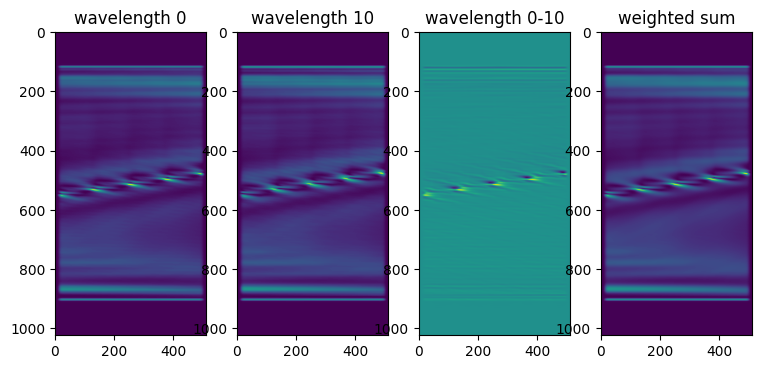

In [2]:
# plot exit field
fig, axes = plt.subplots(1,4, figsize = (9,6), dpi = 100)
E_fields = []

for i in range(11):
    with open(f'../al_4.0_mu_0.25_cutoff_RMS-E/integrated_field/phi_0000_murad/mode_{i:04d}.npy', 'rb') as fid:
        E_end = pickle.load(fid)
        E_fields.append(E_end)
axes[0].imshow(np.abs(E_fields[0])**2)
axes[1].imshow(np.abs(E_fields[10])**2)
axes[2].imshow(np.abs(E_fields[0])**2-np.abs(E_fields[10])**2)
axes[3].imshow(np.sum(np.abs(E_fields)**2, axis = 0))
axes[0].set_title('wavelength 0')
axes[1].set_title('wavelength 10')
axes[2].set_title('wavelength 0-10')
axes[3].set_title('weighted sum')

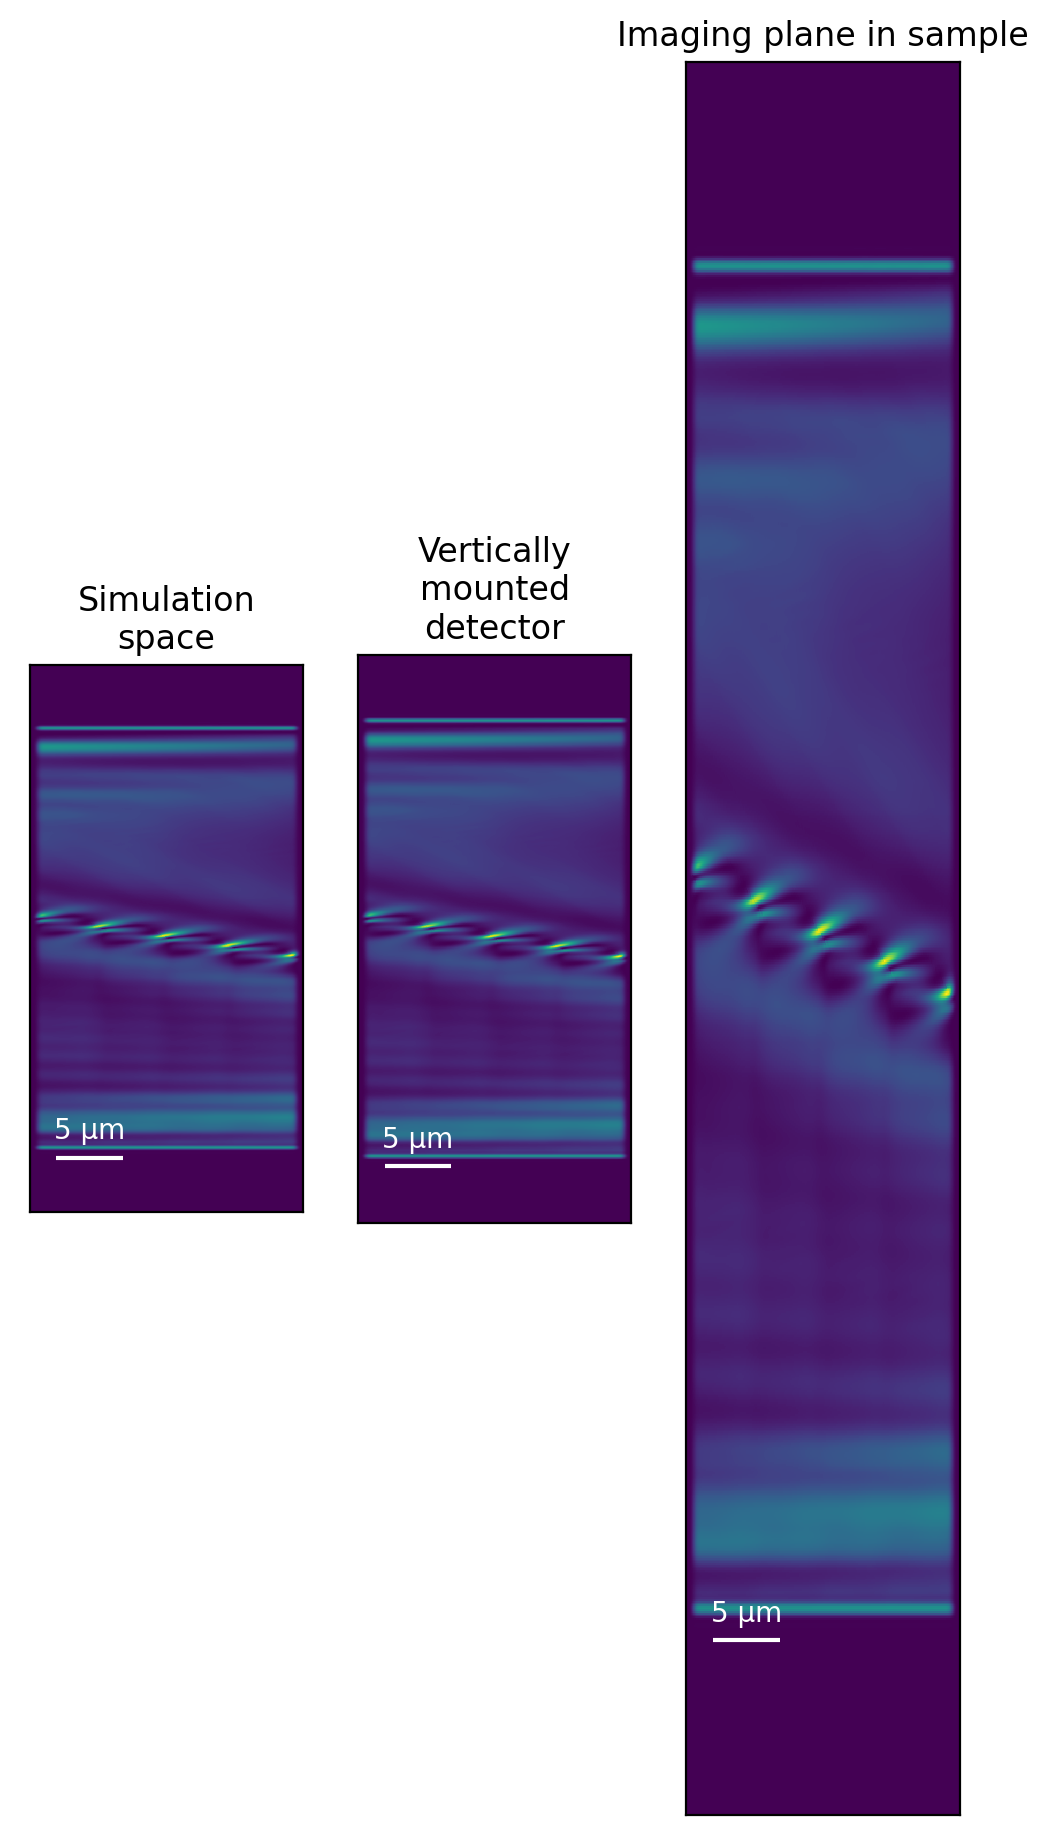

In [3]:
theta = 0.15667238987757678
import sys, os
sys.path.insert(0, '../')
import dfxm_fwrd_sim.parameter_parser as par
par_fn = '../al_4.0_mu_0.25_cutoff_RMS-E/al_4_0.25.ini'
params = par.par_read(par_fn)

xs = params['Geometry']['grid_shape'][0]*params['Geometry']['step_sizes'][0]
ys = params['Geometry']['grid_shape'][1]*params['Geometry']['step_sizes'][1]
fig, axes = plt.subplots(1,3, figsize = (6, 15), facecolor='white', dpi = 200)

#plt.imshow(intens,extent = (y[0]*1e3, y[-1]*1e3,x[0]*1e3,x[-1]*1e3))
axes[0].imshow(np.sum(np.abs(E_fields)**2, axis = 0), extent = (0, ys*1e3, xs*1e3, 0), interpolation = 'nearest', origin = 'lower')
axes[0].set_title('Simulation\nspace')
axes[1].imshow(np.sum(np.abs(E_fields)**2, axis = 0), extent = (0, ys*1e3, xs*1e3*(np.cos(theta)/np.cos(2*theta)), 0), interpolation = 'nearest', origin = 'lower')
axes[1].set_title('Vertically\nmounted\ndetector')
axes[2].imshow(np.sum(np.abs(E_fields)**2, axis = 0), extent = (0, ys*1e3, xs*1e3/2/np.sin(theta), 0), interpolation = 'nearest', origin = 'lower')
axes[2].set_title('Imaging plane in sample')

for ax in axes:
    ypos = ax.get_ylim()[0]*0.9
    ax.plot([2,7],[ypos,ypos], color = [1,1,1], solid_capstyle='butt')
    ax.text(4.5, ypos -2, '5 µm', color = [1,1,1], ha = 'center', va = 'center')
    ax.set_xticks([])
    ax.set_yticks([])
fig.savefig('plot1.svg')

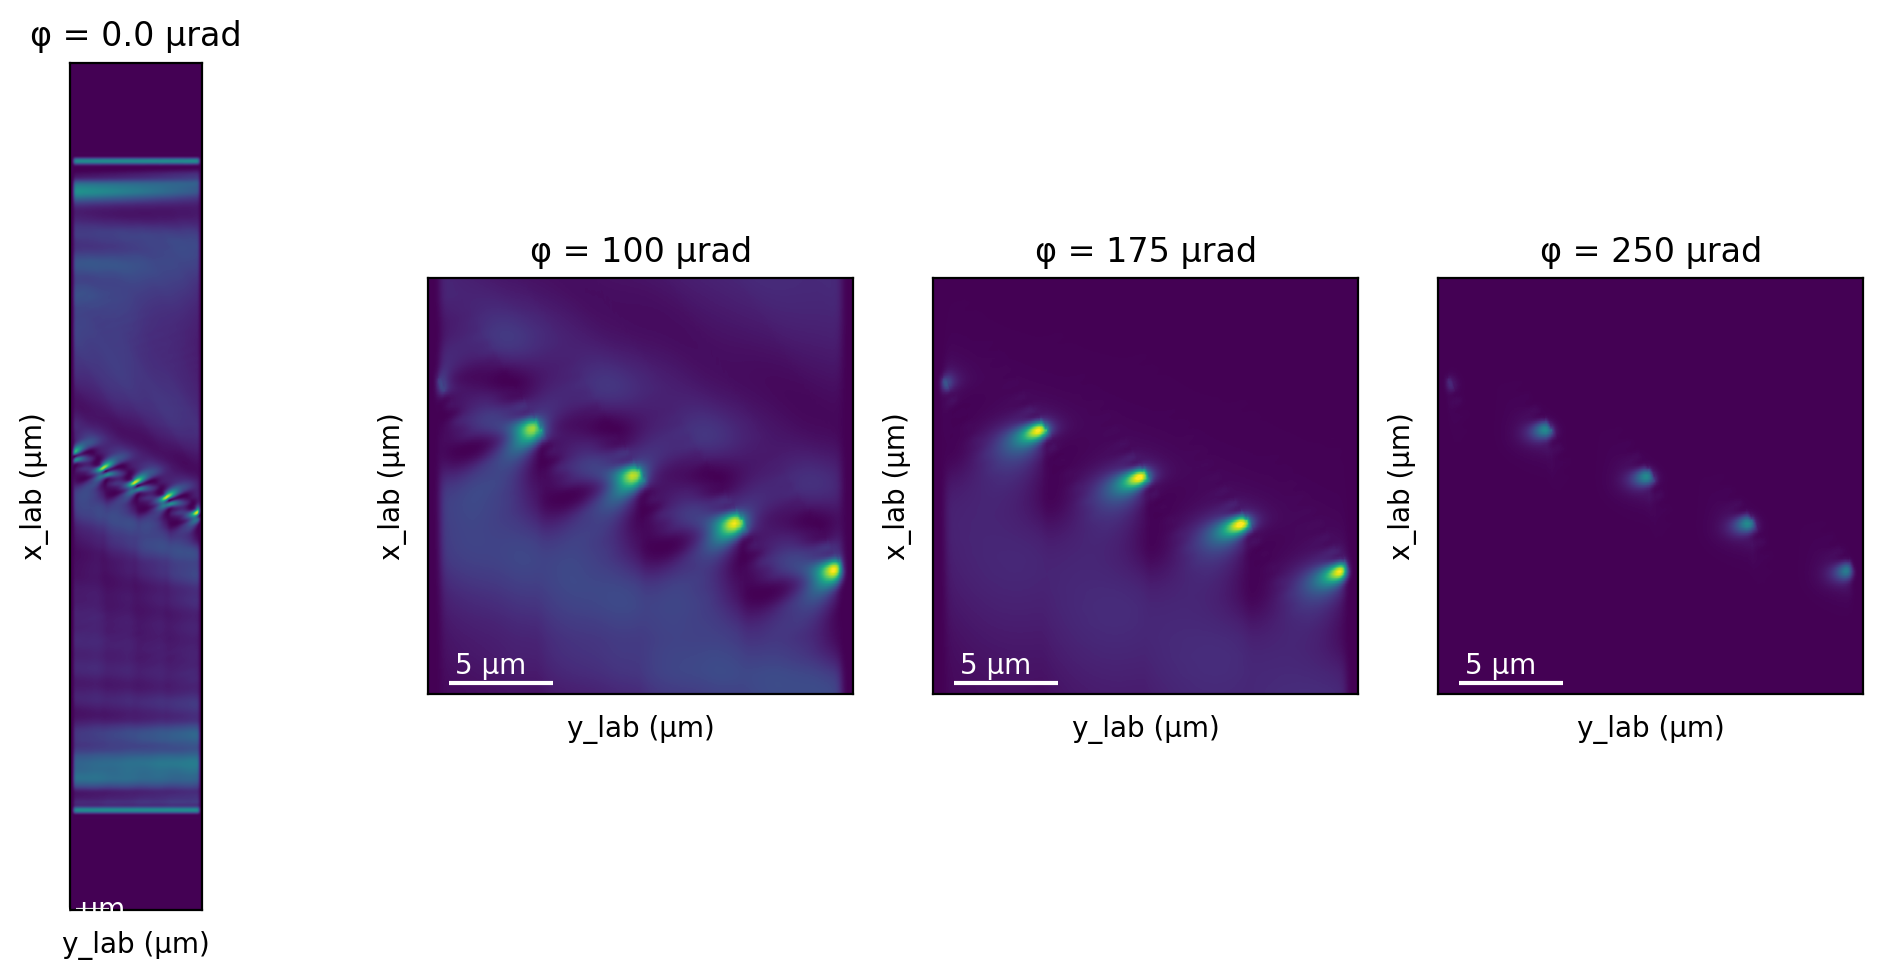

In [10]:

import sys, os
sys.path.insert(0, '../')
# Plot result:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import dfxm_fwrd_sim.parameter_parser as par
par_fn = '../al_4.0_mu_0.25_cutoff_RMS-E/al_4_0.25.ini'
params = par.par_read(par_fn)
theta = 0.15667238987757678
intens000 = np.zeros(params['Geometry']['grid_shape'][:2]) 
intens100 = np.zeros(params['Geometry']['grid_shape'][:2]) 
intens175 = np.zeros(params['Geometry']['grid_shape'][:2])
intens250 = np.zeros(params['Geometry']['grid_shape'][:2])
#intens300 = np.zeros(params['Geometry']['grid_shape'][:2]) 



for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0000_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens000 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0100_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens100 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0175_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens175 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0250_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens250 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
#for modenumber in range(params['Beam']['N_modes']):
#    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0300_murad/mode_{modenumber:04d}.npy', 'rb') as #fid:
#        intens300 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']


x = np.arange(params['Geometry']['grid_shape'][0])*params['Geometry']['step_sizes'][0]
y = np.arange(params['Geometry']['grid_shape'][1])*params['Geometry']['step_sizes'][1]

fig, axes = plt.subplots(1,4, figsize = (10, 5), facecolor='white', dpi = 200)




#plt.imshow(intens,vmax = 600, extent = (y[0]*1e3, y[-1]*1e3,x[0]*1e3,x[-1]*1e3))
im0 = axes[0].imshow(intens000, vmax = np.max(intens100), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[0].set_aspect('equal')
axes[0].set_ylabel('x_lab (µm)')
axes[0].set_xlabel('y_lab (µm)')
axes[0].set_title('φ = 0.0 µrad')
axes[0].set_facecolor([1,1,1])
axes[0].invert_yaxis()
#axes[0].set_ylim((55,75))
#plt.colorbar(im0, ax=axes[0])


im1 = axes[1].imshow(intens100, vmax = np.max(intens100), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[1].set_aspect('equal')
axes[1].set_ylabel('x_lab (µm)')
axes[1].set_xlabel('y_lab (µm)')
axes[1].set_title('φ = 100 µrad')
axes[1].set_facecolor([1,1,1])
axes[1].invert_yaxis()
axes[1].set_ylim((55,75))
#plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(intens175, vmax = np.max(intens100), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[2].set_aspect('equal')
axes[2].set_ylabel('x_lab (µm)')
axes[2].set_xlabel('y_lab (µm)')
axes[2].set_title('φ = 175 µrad')
axes[2].set_facecolor([1,1,1])
axes[2].invert_yaxis()
axes[2].set_ylim((55,75))
#plt.colorbar(im2, ax=axes[2])

im3 = axes[3].imshow(intens250, vmax = np.max(intens100), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[3].set_aspect('equal')
axes[3].set_ylabel('x_lab (µm)')
axes[3].set_xlabel('y_lab (µm)')
axes[3].set_title('φ = 250 µrad')
axes[3].set_facecolor([1,1,1])
axes[3].invert_yaxis()
axes[3].set_ylim((55,75))
#plt.colorbar(im3, ax=axes[3])# ax.set_ylim([60,80])


#im4 = axes[4].imshow(intens300, vmax = np.max(intens000), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
#axes[4].set_aspect('equal')
#axes[4].set_ylabel('x_lab (µm)')
#axes[4].set_xlabel('y_lab (µm)')
#axes[4].set_title('φ = 300 µrad')
#axes[4].set_facecolor([1,1,1])
#axes[4].invert_yaxis()
#axes[4].set_ylim((55,75))
#plt.colorbar(im4, ax=axes[4])# ax.set_ylim([60,80])

for ax in axes:
    ypos = ax.get_ylim()[0]*1.01
    ax.plot([1,6],[ypos,ypos], color = [1,1,1], solid_capstyle='butt')
    ax.text(3, ypos*1.015, '5 µm', color = [1,1,1], ha = 'center', va = 'center')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
#plt.savefig(params['I/O']['root_dir'] + '/cutoff_0.25_correctEnergy.pdf')
plt.show()


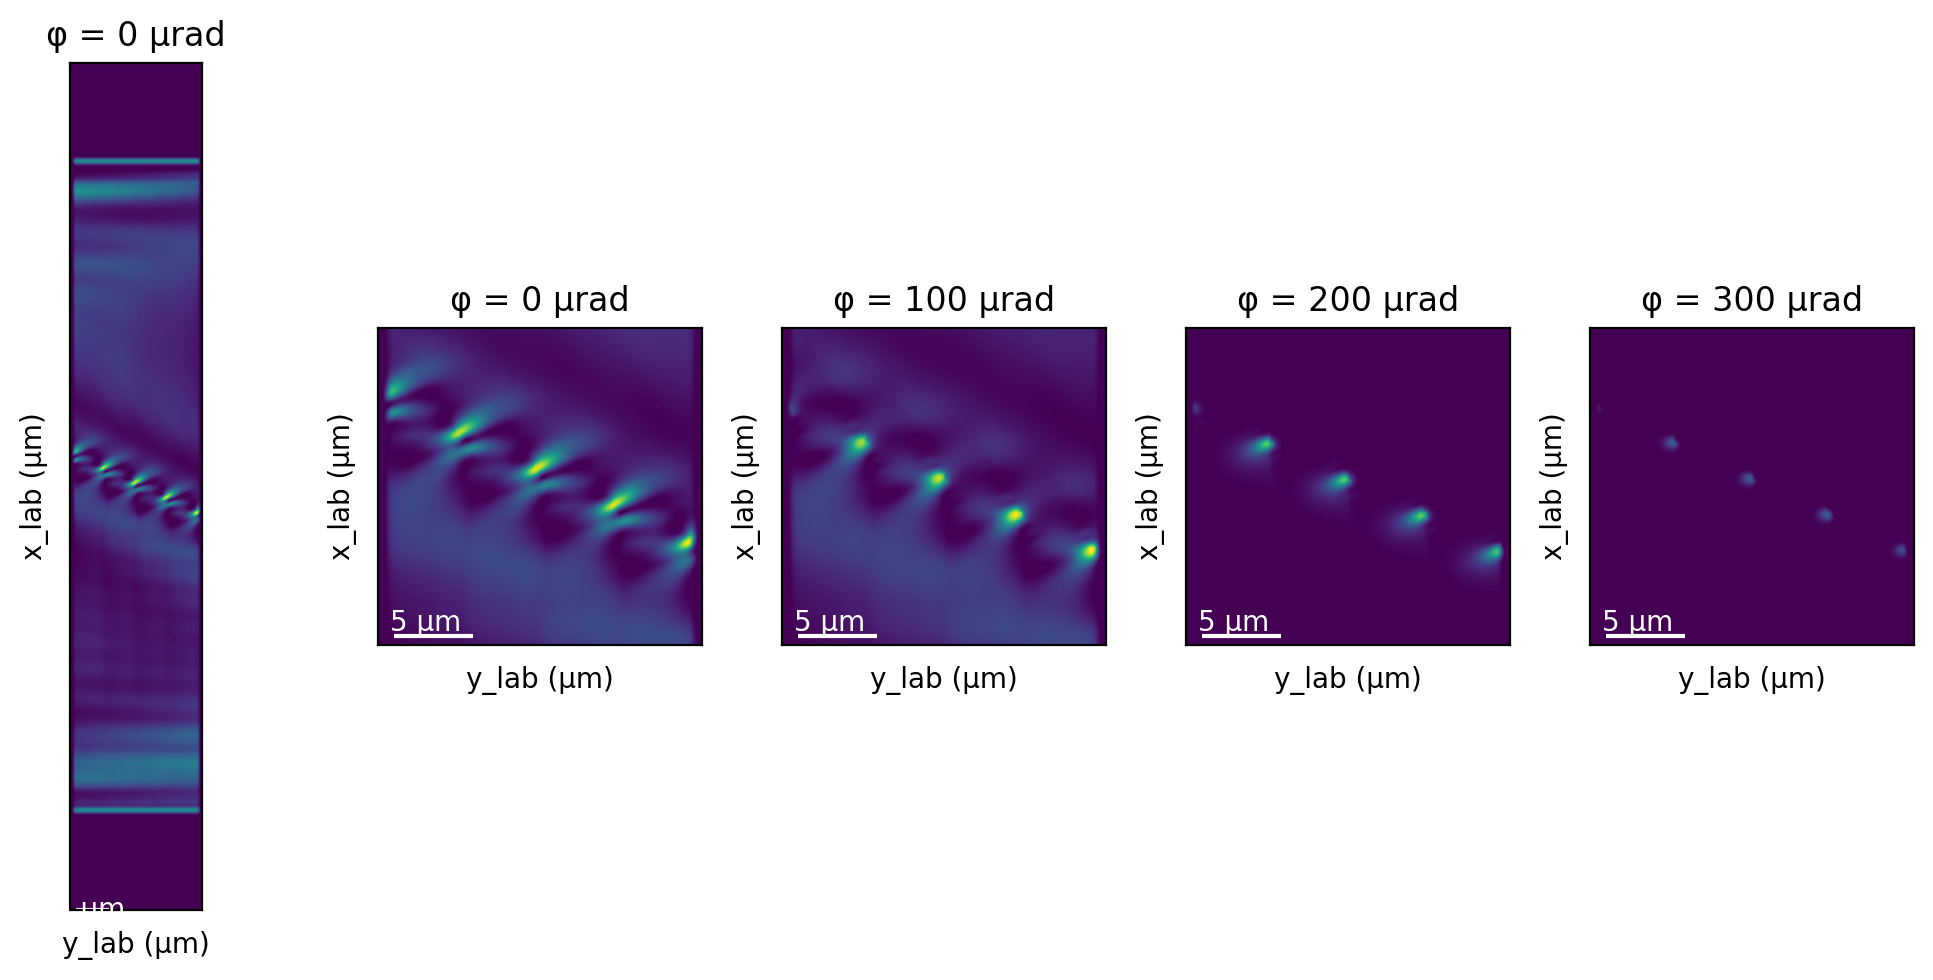

In [26]:

import sys, os
sys.path.insert(0, '../')
# Plot result:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import dfxm_fwrd_sim.parameter_parser as par
par_fn = '../al_4.0_mu_0.25_cutoff_RMS-E/al_4_0.25.ini'
params = par.par_read(par_fn)
theta = 0.15667238987757678
intens000 = np.zeros(params['Geometry']['grid_shape'][:2]) 
intens100 = np.zeros(params['Geometry']['grid_shape'][:2]) 
intens200 = np.zeros(params['Geometry']['grid_shape'][:2])
intens300 = np.zeros(params['Geometry']['grid_shape'][:2])
#intens300 = np.zeros(params['Geometry']['grid_shape'][:2]) 



for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0000_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens000 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0100_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens100 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0200_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens200 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
for modenumber in range(params['Beam']['N_modes']):
    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0300_murad/mode_{modenumber:04d}.npy', 'rb') as fid:
        intens300 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']
#for modenumber in range(params['Beam']['N_modes']):
#    with open(params['I/O']['root_dir'] + f'/integrated_field/phi_0300_murad/mode_{modenumber:04d}.npy', 'rb') as #fid:
#        intens300 += np.abs(pickle.load(fid))**2 * params[f'Mode {modenumber}']['weigth']


x = np.arange(params['Geometry']['grid_shape'][0])*params['Geometry']['step_sizes'][0]
y = np.arange(params['Geometry']['grid_shape'][1])*params['Geometry']['step_sizes'][1]

fig, axes = plt.subplots(1,5, figsize = (10, 5), facecolor='white', dpi = 200)




#plt.imshow(intens,vmax = 600, extent = (y[0]*1e3, y[-1]*1e3,x[0]*1e3,x[-1]*1e3))
im0 = axes[0].imshow(intens000, vmin = 10, vmax = np.max(intens000), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[0].set_aspect('equal')
axes[0].set_ylabel('x_lab (µm)')
axes[0].set_xlabel('y_lab (µm)')
axes[0].set_title('φ = 0 µrad')
axes[0].set_facecolor([1,1,1])
axes[0].invert_yaxis()
#axes[0].set_ylim((55,75))
#plt.colorbar(im0, ax=axes[0])


im1 = axes[1].imshow(intens000, vmin = 10, vmax = np.max(intens000), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[1].set_aspect('equal')
axes[1].set_ylabel('x_lab (µm)')
axes[1].set_xlabel('y_lab (µm)')
axes[1].set_title('φ = 0 µrad')
axes[1].set_facecolor([1,1,1])
axes[1].invert_yaxis()
axes[1].set_ylim((55,75))
#plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(intens100, vmin = 10, vmax = np.max(intens000), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[2].set_aspect('equal')
axes[2].set_ylabel('x_lab (µm)')
axes[2].set_xlabel('y_lab (µm)')
axes[2].set_title('φ = 100 µrad')
axes[2].set_facecolor([1,1,1])
axes[2].invert_yaxis()
axes[2].set_ylim((55,75))
#plt.colorbar(im1, ax=axes[1])

im3 = axes[3].imshow(intens200, vmin = 10, vmax = np.max(intens000), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[3].set_aspect('equal')
axes[3].set_ylabel('x_lab (µm)')
axes[3].set_xlabel('y_lab (µm)')
axes[3].set_title('φ = 200 µrad')
axes[3].set_facecolor([1,1,1])
axes[3].invert_yaxis()
axes[3].set_ylim((55,75))
#plt.colorbar(im3, ax=axes[2])

im4 = axes[4].imshow(intens300, vmin = 10, vmax = np.max(intens000), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
axes[4].set_aspect('equal')
axes[4].set_ylabel('x_lab (µm)')
axes[4].set_xlabel('y_lab (µm)')
axes[4].set_title('φ = 300 µrad')
axes[4].set_facecolor([1,1,1])
axes[4].invert_yaxis()
axes[4].set_ylim((55,75))
#plt.colorbar(im3, ax=axes[3])# ax.set_ylim([60,80])


#im4 = axes[4].imshow(intens300, vmax = np.max(intens000), extent = (y[0]*1e3, y[-1]*1e3,x[-1]*1e3/2/np.sin(theta),x[0]*1e3/2/np.sin(theta)))
#axes[4].set_aspect('equal')
#axes[4].set_ylabel('x_lab (µm)')
#axes[4].set_xlabel('y_lab (µm)')
#axes[4].set_title('φ = 300 µrad')
#axes[4].set_facecolor([1,1,1])
#axes[4].invert_yaxis()
#axes[4].set_ylim((55,75))
#plt.colorbar(im4, ax=axes[4])# ax.set_ylim([60,80])

for ax in axes:
    ypos = ax.get_ylim()[0]*1.01
    ax.plot([1,6],[ypos,ypos], color = [1,1,1], solid_capstyle='butt')
    ax.text(3, ypos*1.015, '5 µm', color = [1,1,1], ha = 'center', va = 'center')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig(params['I/O']['root_dir'] + '/cutoff_0.25_correctEnergy.svg')
plt.show()


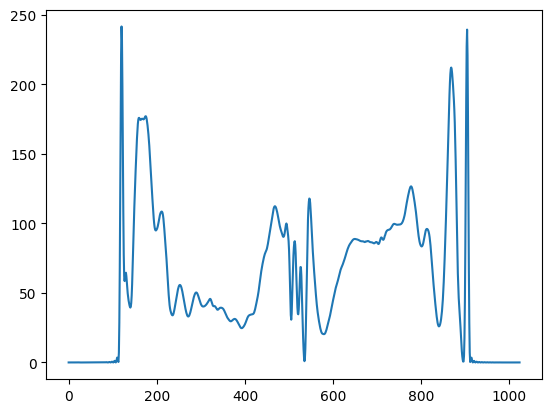

In [17]:
plt.plot(intens000[:,200])